In [2]:
from ultralytics import YOLO
from ultralytics.utils import YAML

import torch
import numpy as np
from ultralytics.utils import DEFAULT_CFG
from ultralytics.data.utils import check_cls_dataset, check_det_dataset

# DEFAULT_CFG = YAML.load('default.yaml')

from ultralytics.utils import DEFAULT_CFG
DEFAULT_CFG.imgsz
DEFAULT_CFG.augment = False

In [3]:

file = 'AFDET_dataset.yaml'
# results = model.train(data='AFDET_dataset.yaml', epochs=1, imgsz=250)
data = YAML.load(file)  # dictionary
data


{'path': '/media/kaizen/T7/Project/final_project/Project//Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/',
 'train': 'images/train',
 'val': 'images/val',
 'names': {0: 'scratch', 1: 'paint_peel', 2: 'rust', 3: 'rivet_damage'}}

In [4]:

data = check_det_dataset(file)
data

{'path': PosixPath('/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo'),
 'train': '/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/train',
 'val': '/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/val',
 'names': {0: 'scratch', 1: 'paint_peel', 2: 'rust', 3: 'rivet_damage'},
 'yaml_file': 'AFDET_dataset.yaml',
 'nc': 4,
 'channels': 3}

In [5]:

from ultralytics.data import build_dataloader, build_yolo_dataset
# if you use mode 'train' it'll apply unwanted augmentations
dataset = build_yolo_dataset(DEFAULT_CFG, data['train'], 1, data, mode='val' )
dataset[0].keys()
dataset[0]['img'].shape

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 698.9±1363.9 MB/s, size: 30.6 KB)
val: Scanning /media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/labels/train.cache... 344 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 344/344 131.2Mit/s 0.0s


torch.Size([3, 640, 640])

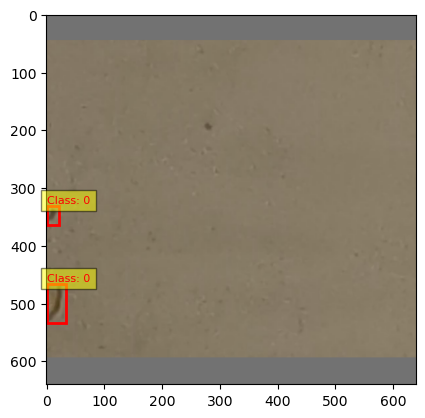

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from PIL import Image
import cv2

sample = dataset[1]
def display_sample(sample):
    fig, pp = plt.subplots(1)


    # Get image (convert from tensor if needed)
    img = sample['img']
    img = img.cpu().numpy().transpose(1, 2, 0)

    # Get bounding boxes and classes
    bboxes = sample.get('bboxes', [])
    cls = sample.get('cls', [])

    pp.imshow(img)

    # Draw bounding boxes (YOLO format: center_x, center_y, width, height normalized)
    h, w = img.shape[:2]
    for bbox, class_id in zip(bboxes, cls):
        cx, cy, bw, bh = bbox[:4]
        x1 = int((cx - bw/2) * w)
        y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w)
        y2 = int((cy + bh/2) * h)
        
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                                linewidth=2, edgecolor='r', facecolor='none')
        pp.add_patch(rect)
        pp.text(x1, y1-5, f'Class: {int(class_id)}', 
                        color='red', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.5))

display_sample(sample)

In [7]:
data['names'][0]

'scratch'

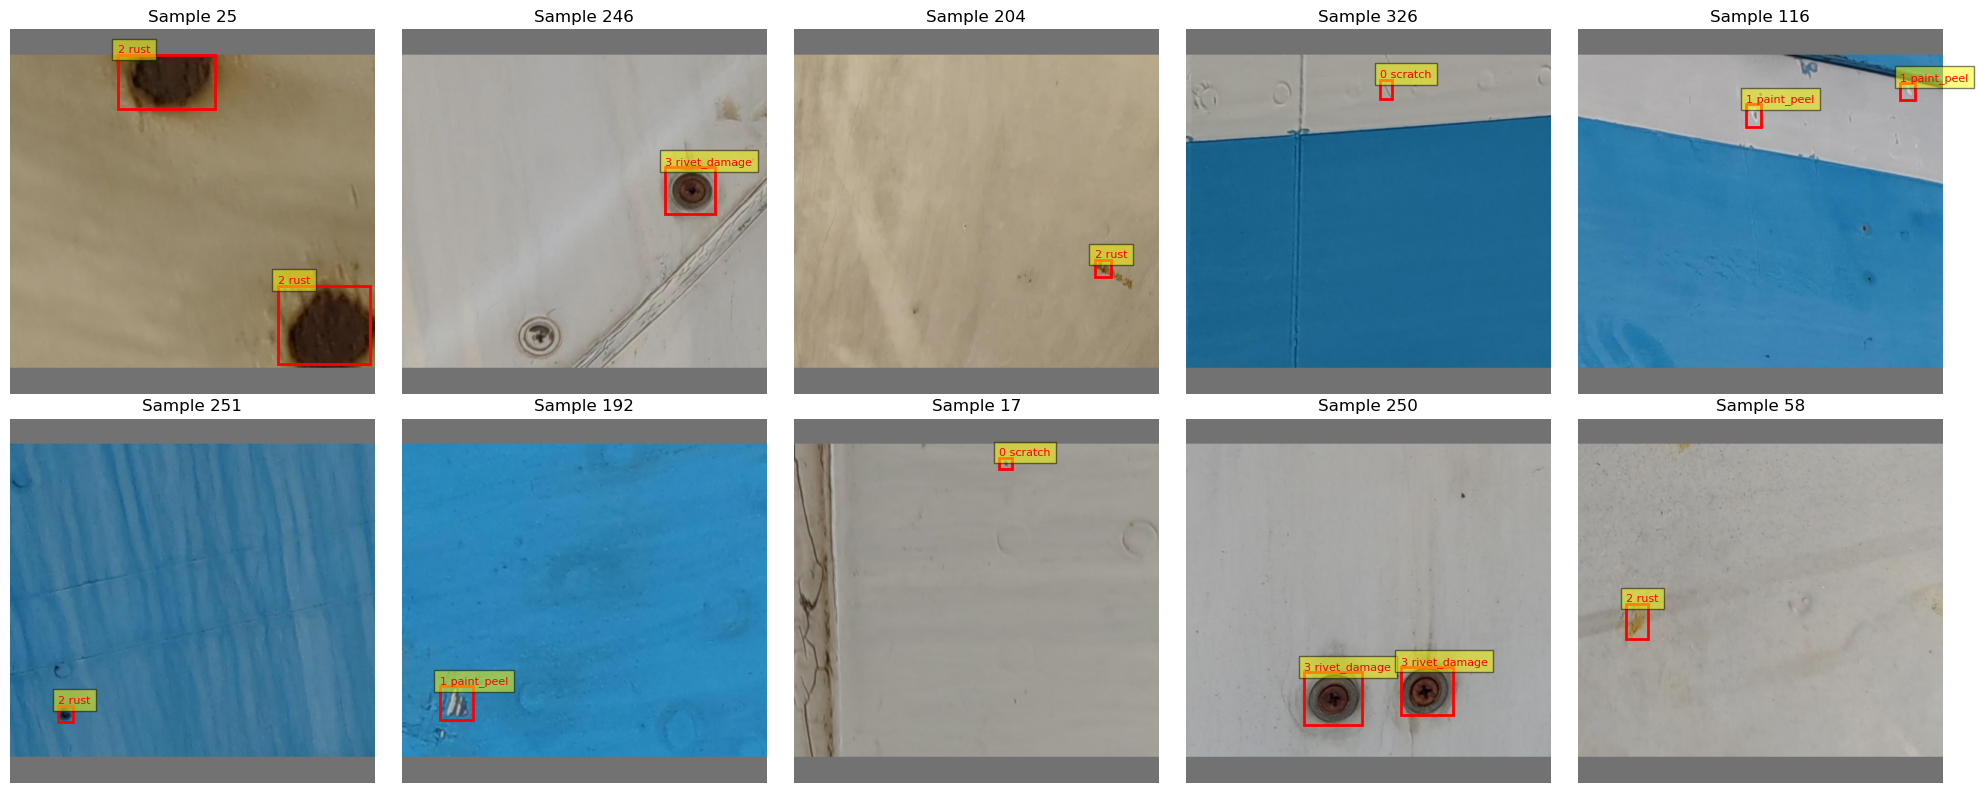

In [8]:
# Get random indices
num_samples = min(10, len(dataset))
random_indices = random.sample(range(len(dataset)), num_samples)
# random_indices = list(range(num_samples))

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, sample_idx in enumerate(random_indices):
    sample = dataset[sample_idx]
    
    # Get image (convert from tensor if needed)
    img = sample['img']
    if isinstance(img, torch.Tensor):
        img = img.cpu().numpy().transpose(1, 2, 0).astype(np.uint8)
    else:
        img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)
    
    # Get bounding boxes and classes
    bboxes = sample.get('bboxes', [])
    cls = sample.get('cls', [])
    
    # Display image
    axes[idx].imshow(img)
    axes[idx].set_title(f'Sample {sample_idx}')
    axes[idx].axis('off')
    
    # Draw bounding boxes (YOLO format: center_x, center_y, width, height normalized)
    h, w = img.shape[:2]
    for bbox, class_id in zip(bboxes, cls):
        cx, cy, bw, bh = bbox[:4]
        x1 = int((cx - bw/2) * w)
        y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w)
        y2 = int((cy + bh/2) * h)
        
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                                linewidth=2, edgecolor='r', facecolor='none')
        axes[idx].add_patch(rect)
        axes[idx].text(x1, y1-5, f'{int(class_id)} {data["names"][int(class_id)]}', 
                      color='red', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

In [9]:
dataset.labels

[{'im_file': '/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/train/002.jpg',
  'shape': (960, 1120),
  'cls': array([[          0],
         [          0],
         [          0],
         [          0],
         [          0]], dtype=float32),
  'bboxes': array([[   0.032143,     0.49687,    0.035714,    0.052083],
         [     0.0625,      0.2224,    0.026786,    0.036458],
         [       0.95,       0.625,    0.035714,     0.11667],
         [     0.8567,     0.35833,    0.022321,    0.035417],
         [    0.84821,     0.73646,    0.028571,      0.0375]], dtype=float32),
  'segments': [],
  'keypoints': None,
  'normalized': True,
  'bbox_format': 'xywh'},
 {'im_file': '/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/train/003.jpg',
  'shape': (960, 1120),
  'cls': array([[          0],
         [          0]], dtype=float32),
  'bboxes': array([[   0.

In [10]:
from ultralytics.utils.plotting import plot_labels

val_dataset = build_yolo_dataset(DEFAULT_CFG, data['val'], 1, data, mode='val' )
boxes = np.concatenate([lb["bboxes"] for lb in val_dataset.labels], 0)
cls = np.concatenate([lb["cls"] for lb in val_dataset.labels], 0)
plot_labels(boxes, cls.squeeze(), names=val_dataset.data["names"])

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 86.9±46.4 MB/s, size: 40.3 KB)
val: Scanning /media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/labels/val.cache... 45 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 45/45 18.9Mit/s 0.0s
Plotting labels to labels.jpg... 


In [11]:

from ultralytics.utils.plotting import plot_labels

train_dataset = build_yolo_dataset(DEFAULT_CFG, data['train'], 1, data, mode='val' )
boxes = np.concatenate([lb["bboxes"] for lb in train_dataset.labels], 0)
cls = np.concatenate([lb["cls"] for lb in train_dataset.labels], 0)
plot_labels(boxes, cls.squeeze(), names=train_dataset.data["names"])

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 349.2±569.8 MB/s, size: 35.5 KB)
val: Scanning /media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/labels/train.cache... 344 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 344/344 160.3Mit/s 0.0s
Plotting labels to labels.jpg... 


In [11]:
# get max and min box sizes
widths = boxes[:, 2]
heights = boxes[:, 3]
print('width: ', widths.max(), widths.min())
print('height: ', heights.max(), heights.min())

width:  0.478571 0.014286
height:  0.488542 0.016667


276.0 153.0 297.0 139.0


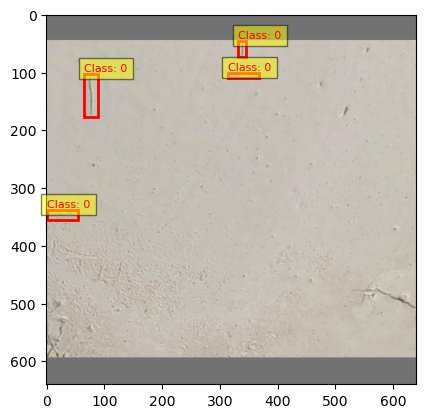

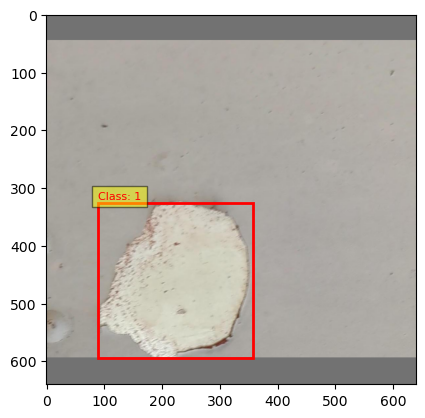

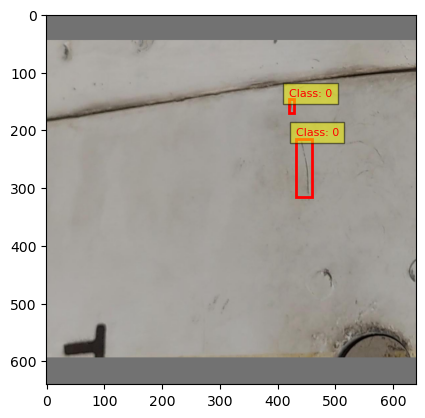

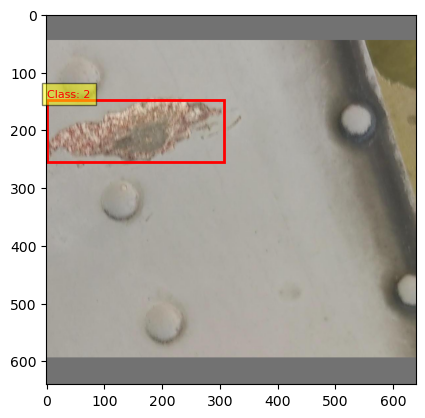

In [12]:
# which image max max and min hight and width
# add dataset id in the last column of boxes
np.array([[0]]*train_dataset.labels[0]['bboxes'].shape[0]).shape
train_dataset.labels[0]['bboxes'].shape
# np.concatenate((train_dataset.labels[0]['bboxes'], np.array([[1]]*train_dataset.labels[0]['bboxes'].shape[0])), 1)
boxes = np.concatenate([np.concatenate((lb["bboxes"], np.array([[i]]*lb["bboxes"].shape[0])), 1) for i, lb in enumerate(train_dataset.labels)] , 0)
# boxes = np.concatenate([boxes, np.array([[i]]*boxes.shape[0]) for i, lb in enumerate(train_dataset.labels)], 0)

# cls = np.concatenate([lb["cls"] for lb in train_dataset.labels], 0)
max_width_idx = np.argmax(widths)
max_width_idx = boxes[max_width_idx, -1]
min_width_idx = np.argmin(widths)
min_width_idx = boxes[min_width_idx, -1]
max_height_idx = np.argmax(heights) 
max_height_idx = boxes[max_height_idx, -1]
min_height_idx = np.argmin(heights)
min_height_idx = boxes[min_height_idx, -1]

print(min_height_idx, max_height_idx, min_width_idx, max_width_idx)

# # plot these images


sample = train_dataset[int(min_height_idx)]
# sample['bboxes']
display_sample(sample)
display_sample(train_dataset[int(max_height_idx)])
display_sample(train_dataset[int(min_width_idx)])
display_sample(train_dataset[int(max_width_idx)])



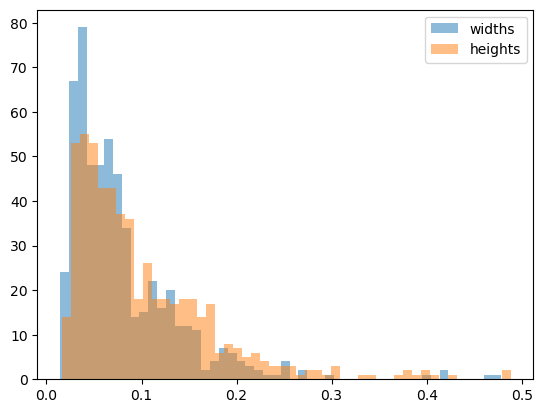

In [89]:
# plt.plot(boxes[:, 2], boxes[:, 3], 'o')
plt.hist(boxes[:, 2], bins=50, alpha=0.5, label='widths')
plt.hist(boxes[:, 3], bins=50, alpha=0.5, label='heights')
plt.legend()

In [ ]:
# # Create visualization folder
# import os
# output_dataset_folder = 'Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/'
# train_folder = 'Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/train/'
# viz_folder = os.path.join(output_dataset_folder, 'visualizations_train')
# image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
# image_files = [f for f in os.listdir(output_dataset_folder + 'images/train') 
#                if os.path.splitext(f)[1].lower() in image_extensions]
# os.makedirs(viz_folder, exist_ok=True)

# # Process each image with visualizations
# for idx, image_file in enumerate(image_files):
#     image_path = os.path.join(train_folder, image_file)
#     img = cv2.imread(image_path)
#     img_height, img_width = img.shape[:2]
    
#     # Read labels and confidence scores
#     label_filename = os.path.splitext(image_file)[0] + '.txt'
#     conf_label_filename = os.path.splitext(image_file)[0] + "_conf" + '.txt'
#     label_path = os.path.join(output_dataset_folder, 'labels', 'train', label_filename)
#     conf_label_path = os.path.join(output_dataset_folder, 'labels', 'train', conf_label_filename)
    
#     # Draw bounding boxes on image
#     if os.path.exists(label_path):
#         with open(label_path, 'r') as f:
#             labels = f.readlines()
#         # with open(conf_label_path, 'r') as conf_f:
#         #     confidences = conf_f.readlines()
        
#         for label_line in labels:
#             parts = label_line.strip().split()
#             # conf_score = float(conf_line.strip())
            
#             class_id = int(parts[0])
#             x_center = float(parts[1]) * img_width
#             y_center = float(parts[2]) * img_height
#             width = float(parts[3]) * img_width
#             height = float(parts[4]) * img_height
            
#             x1 = int(x_center - width / 2)
#             y1 = int(y_center - height / 2)
#             x2 = int(x_center + width / 2)
#             y2 = int(y_center + height / 2)
            
#             # Draw rectangle
#             cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
#             # Put confidence score text
#             text = f"Class {class_id}"
#             cv2.putText(img, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 
#                        0.5, (0, 255, 0), 2)
    
#     # Save visualization
#     output_viz_path = os.path.join(viz_folder, image_file)
#     cv2.imwrite(output_viz_path, img)
    
#     if (idx + 1) % 10 == 0:
#         print(f"Visualized {idx + 1}/{len(image_files)} images...")

# print("Visualization complete!")
# print(f"Visualizations saved to: {viz_folder}")

Visualized 10/344 images...
Visualized 20/344 images...
Visualized 30/344 images...
Visualized 40/344 images...
Visualized 50/344 images...
Visualized 60/344 images...
Visualized 70/344 images...
Visualized 80/344 images...
Visualized 90/344 images...
Visualized 100/344 images...
Visualized 110/344 images...
Visualized 120/344 images...
Visualized 130/344 images...
Visualized 140/344 images...
Visualized 150/344 images...
Visualized 160/344 images...
Visualized 170/344 images...
Visualized 180/344 images...
Visualized 190/344 images...
Visualized 200/344 images...
Visualized 210/344 images...
Visualized 220/344 images...
Visualized 230/344 images...
Visualized 240/344 images...
Visualized 250/344 images...
Visualized 260/344 images...
Visualized 270/344 images...
Visualized 280/344 images...
Visualized 290/344 images...
Visualized 300/344 images...
Visualized 310/344 images...
Visualized 320/344 images...
Visualized 330/344 images...
Visualized 340/344 images...
Visualization complete!

In [16]:
import os
data_path = 'Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo'
images_folder = os.path.join(data_path, 'images', 'train')
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
image_files = [f for f in os.listdir(images_folder) 
               if os.path.splitext(f)[1].lower() in image_extensions]
len(image_files)

344

In [22]:
import pandas as pd
records = []
for idx, image_file in enumerate(image_files):
    image_path = os.path.join(images_folder, image_file)
    label_filename = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(data_path, 'labels', 'train', label_filename)

    if not os.path.exists(label_path):
        continue

    with open(label_path, 'r') as f:
        labels = [ln.strip() for ln in f if ln.strip()]

    # ensure same length
    for lbl in labels:
        parts = lbl.split()
        if len(parts) < 5:
            continue
        try:
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
        except:
            continue
        records.append({
            'image': image_file,
            'class': class_id,
            'x_center': x_center,
            'y_center': y_center,
            'width': width,
            'height': height,
        })

df = pd.DataFrame.from_records(records, columns=['image','class','x_center','y_center','width','height'])
df
# ...existing code...

,image,class,x_center,y_center,width,height
0,197.jpg,0,0.704911,0.405208,0.118750,0.179167
1,202.jpg,3,0.130804,0.213542,0.125893,0.152083
2,184.jpg,1,0.034821,0.152604,0.067857,0.144792
3,039.jpg,2,0.919196,0.404167,0.156250,0.197917
4,039.jpg,2,0.633036,0.872396,0.194643,0.203125
...,...,...,...,...,...,...
559,059.jpg,0,0.539732,0.124479,0.066964,0.032292
560,325.jpg,3,0.195982,0.502604,0.197321,0.223958
561,186.jpg,1,0.710714,0.745833,0.416071,0.487500
562,233.jpg,0,0.176786,0.885417,0.091071,0.229167


In [24]:
df['class'].value_counts() - 300

class
0    -32
1   -175
2   -198
3   -231
Name: count, dtype: int64